In [1]:
import numpy as np  
import pandas as pd  
import scipy.stats as stats  
import matplotlib.pyplot as plt  
import sklearn  

In [2]:
def getData():
    from sklearn.datasets import load_boston  
    boston = load_boston()  
    features=boston.feature_names 
    bos = pd.DataFrame(boston.data,columns=features)
    target =pd.DataFrame(boston.target,columns=["Price"])
    inputData=pd.concat([bos,target],axis=1)
    initData=inputData
    return inputData,initData
data,initData = getData()

uniqueId = ""
target = "Price"
features = ["TAX","PTRATIO","LSTAT","INDUS","NOX","DIS","RAD"]
#features = ["TAX","PTRATIO","LSTAT","INDUS","NOX","DIS","RAD"]
testsize=0.3

In [3]:
if(uniqueId==""):
    uniqueId=uniqueId
    uniqueIdGenerator=np.arange(1,len(data))
    UqId=pd.DataFrame(list(uniqueIdGenerator),columns=["UniqueId"])
    #data=pd.concat([UqId,data],axis=1) 
    initData=pd.concat([UqId,data],axis=1) 
    uniqueId=initData.columns[0]
print(initData.head(10))

   UniqueId     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  \
0       1.0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0   
1       2.0  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0   
2       3.0  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0   
3       4.0  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0   
4       5.0  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0   
5       6.0  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0   
6       7.0  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0   
7       8.0  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0   
8       9.0  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0   
9      10.0  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0   

     TAX  PTRATIO       B  LSTAT  Price  
0  296.0     15.3  396.90   4.98   24.0  
1  242.0     17.8  396.90   9.14   21.6  
2  242.0     17.8  392.83 

In [4]:
#Python method for handling nan values
#Numerical columns replaced with mean
#String columns replaced with mode
from collections import Counter
def dataCleaning(inputData,features,uniqueId,target):
    updatedData =  inputData[target]   
    dataForClean=pd.DataFrame()
    for i in range(0,len(features)):
        dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[features[i]])],axis=1)
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[target])],axis=1)
    inputData=dataForClean
    for i in range(0,len(inputData.columns)):
        colName=inputData.columns[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colName != uniqueId):
            mode=Counter(inputData[colName])
            modeval= mode.most_common(1)[0][0]
            inputData[colName]= inputData[colName].replace(np.NaN, modeval)
        else:
            inputData[colName]= inputData[colName].replace(np.NaN, np.mean(inputData[colName]))

    
    return inputData,updatedData

data,updatedData=dataCleaning(data,features,uniqueId,target)
#print(data.head(10))

In [5]:
#Python method for pre-processing the data
#Categorical variables are label and one hot encoded
def dataPreProcess(inputData,target):
    from sklearn import preprocessing 
    labelencoder= preprocessing.LabelEncoder()
    onehotencoder = preprocessing.OneHotEncoder(sparse=False)
    notencoded = pd.DataFrame()
    encoded = pd.DataFrame()
    colNames=[]
    for i in range(0,len(inputData.columns)):
        colNames.append(inputData.columns[i])
        
    for i in range(0,len(colNames)):
        colName=colNames[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colNames[i] != uniqueId):
            df =  labelencoder.fit_transform(inputData[colName])
            df = np.array(inputData[colName])
            df =   df.reshape(len(df),1)
            onehot_encoded = onehotencoder.fit_transform(df)
            onehot_encoded = pd.DataFrame(onehot_encoded)
            #onehot_encoded = onehot_encoded.drop(len(onehot_encoded.columns)-1,axis=1)
            encoded=pd.concat([onehot_encoded,encoded],axis=1)       
        else:
            notencoded=  pd.concat([notencoded,inputData[colName]],axis=1)
    combinedData=pd.concat([encoded,notencoded],axis=1)
    updatedData=pd.DataFrame()
    updatedData=pd.concat([updatedData,combinedData],axis=1) 
    Y = pd.DataFrame() 
    Y = pd.DataFrame(updatedData[target])
    del updatedData[target]
    X = pd.DataFrame()
    X = updatedData
   
    return X,Y

X,Y=dataPreProcess(data,target)
#print(X.head(10))
#print(Y.head(10))

In [6]:
def datasplit(X,Y,size):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=size, shuffle=False)
    return X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test=datasplit(X,Y,testsize)
print(X_train.head(5))
print(X_test.head(5))
print(Y_train.head(5))
print(Y_test.head(5))

     TAX  PTRATIO  LSTAT  INDUS    NOX     DIS  RAD
0  296.0     15.3   4.98   2.31  0.538  4.0900  1.0
1  242.0     17.8   9.14   7.07  0.469  4.9671  2.0
2  242.0     17.8   4.03   7.07  0.469  4.9671  2.0
3  222.0     18.7   2.94   2.18  0.458  6.0622  3.0
4  222.0     18.7   5.33   2.18  0.458  6.0622  3.0
       TAX  PTRATIO  LSTAT  INDUS    NOX      DIS   RAD
354  334.0     22.0   8.05   1.91  0.413  10.5857   4.0
355  334.0     22.0   5.57   1.91  0.413  10.5857   4.0
356  666.0     20.2  17.60  18.10  0.770   2.1222  24.0
357  666.0     20.2  13.27  18.10  0.770   2.5052  24.0
358  666.0     20.2  11.48  18.10  0.770   2.7227  24.0
   Price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2
     Price
354   18.2
355   20.6
356   17.8
357   21.7
358   22.7


In [7]:
#Python method for performing logistic regression
def linearRegression(X_train, X_test, Y_train, Y_test): 
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train,Y_train)        
    predictions = regressor.predict(X_test) 
    score = regressor.score(X_test, Y_test)
    return predictions,score

predictions,score=linearRegression(X_train, X_test, Y_train, Y_test)
n=len(data)
p=len(features)
adjr= 1-(1-score)*(n-1)/(n-p-1)
output1=pd.DataFrame(list(Y_test[target]),columns=["Actual"])
output2=pd.DataFrame(list(predictions),columns=["Predicted"])
prednactual=pd.concat([output1,output2],axis=1)
testStart=list(initData[uniqueId][len(X_train):len(data)])
testStart=pd.DataFrame(testStart,columns=[uniqueId])
testStart.reset_index(drop=True, inplace=True)
prednactual.reset_index(drop=True, inplace=True)
prednactualfinal=pd.concat([testStart,prednactual],axis=1)

print(".........OriginalData............")
print(initData.head(5))

print(".............Unique and target variables..............")
print("UniqueId: ",uniqueId)
print("Target variable: ",target)


.........OriginalData............
   UniqueId     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0       1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1       2.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2       3.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3       4.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4       5.0  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  Price  
0  296.0     15.3  396.90   4.98   24.0  
1  242.0     17.8  396.90   9.14   21.6  
2  242.0     17.8  392.83   4.03   34.7  
3  222.0     18.7  394.63   2.94   33.4  
4  222.0     18.7  396.90   5.33   36.2  
.............Unique and target variables..............
UniqueId:  UniqueId
Target variable:  Price


In [8]:
print(".........Input Data............")
print(data.head(5))


print(".........Output Data............")
print(prednactualfinal.head(5))

.........Input Data............
     TAX  PTRATIO  LSTAT  INDUS    NOX     DIS  RAD  Price
0  296.0     15.3   4.98   2.31  0.538  4.0900  1.0   24.0
1  242.0     17.8   9.14   7.07  0.469  4.9671  2.0   21.6
2  242.0     17.8   4.03   7.07  0.469  4.9671  2.0   34.7
3  222.0     18.7   2.94   2.18  0.458  6.0622  3.0   33.4
4  222.0     18.7   5.33   2.18  0.458  6.0622  3.0   36.2
.........Output Data............
   UniqueId  Actual  Predicted
0     355.0    18.2  14.263243
1     356.0    20.6  16.242735
2     357.0    17.8  15.155607
3     358.0    21.7  18.096782
4     359.0    22.7  19.233094


In [9]:
print(".............Evaluation metrics..............")
from sklearn import metrics
print("RSquared: ",score)
print("AdjustedRSquared: ",adjr)
print('MAE', metrics.mean_absolute_error(Y_test, predictions))
print('MSE', metrics.mean_squared_error(Y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

.............Evaluation metrics..............
RSquared:  0.5060155455098331
AdjustedRSquared:  0.4990719889206139
MAE 3.7050965977165378
MSE 32.77402723178941
RMSE 5.724860455224163


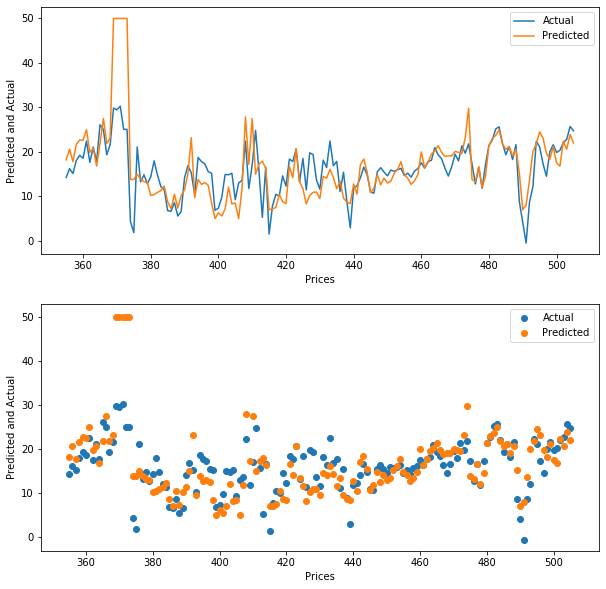

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,10))
y_axis_pred = prednactualfinal["Predicted"]
y_axis_actual = prednactualfinal["Actual"]
x_axis= prednactualfinal[uniqueId]
axes[0].plot(x_axis,y_axis_pred)
axes[0].plot(x_axis,y_axis_actual)
axes[0].set_xlabel('Prices')
axes[0].set_ylabel('Predicted and Actual')
axes[0].legend(labels=['Actual', 'Predicted'])
axes[1].scatter(x_axis,y_axis_pred)
axes[1].scatter(x_axis,y_axis_actual)
axes[1].set_xlabel('Prices')
axes[1].set_ylabel('Predicted and Actual')
axes[1].legend(labels=['Actual', 'Predicted'])
plt.show()


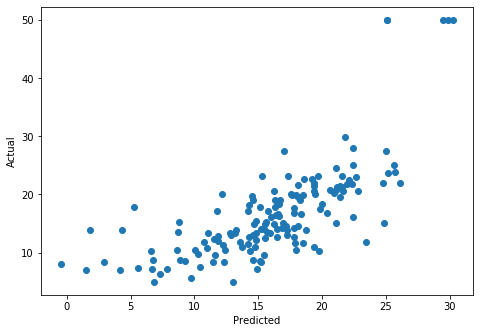

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.scatter(y_axis_pred ,y_axis_actual) # solid line with yellow colour and square marker
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()